In [159]:
import json

datasetpath = "../dataset/lyrics-1554383562280.json"

# https://github.com/stopwords-iso/stopwords-fr/edit/master/stopwords-fr.json
stopwords_from_github = ["j'te", "j'ai", "j'suis", "j'veux", "t'as", "c'est", "qu'il", "t'es", "di", "qu'on", "j'me", "j'fais", "a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]

with open(datasetpath) as json_file:  
    data = json.load(json_file)

    
"""
lyrics.json contains json dataset. See the scrapper component.
Example JSON data set :
{
    "artistName": {
        "popularity": 0.2,
        "followers": 200,
        "image: "http://.../"
        "songs": [
            {
                "song": "songName",
                "lyrics": "lyrics\nlyrics\n",
            }
        ]
        
    }
}
"""
    
print("Number of artists :", len(data))


Number of artists : 119


In [160]:
# Download NTLK dependencies

import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd

songs = []

section_pattern = r'\[[^\]]*\]'
stop_words = set(stopwords.words('french'))
stop_words.add(('de', 'le', 'ça', 'ca'))


for artist in data:
    for i, song in enumerate(data[artist]['songs']):
        #print(song['song'], i)
        # Remove Sections (eg: [Chorus])
        tokens = re.sub(section_pattern, '', song['lyrics'])
        tokens = set(word_tokenize(tokens))
        count_raw_words = len(tokens)
        
        # Remove punctionations & stopwords. We filter 1 char tokens
        tokens = [w for w in tokens if len(w) > 1 and not w.lower() in stopwords_from_github]
        count_filtered_words = len(tokens)
        

        #tokens = [w for w in tokens if not w in stop_words]
        
        song = {
            'artist': artist,
            'name': song['song'],
            'filtered_tokens': tokens,
            'count_raw_words': count_raw_words,
            'count_filtered_words': count_filtered_words,
            'artist_popularity': data[artist]['popularity'],
            'artist_followers': data[artist]['followers'],
            'artist_image': data[artist]['image'],
            #'lyrics': song['lyrics']
        }
        songs.append(song)
        
songs

## Create a Pandas Dataframe from the dict
df = pd.DataFrame(songs)
#, columns=['author', 'name', 'filtered_tokens', 'raw_word_counts', 'filtered_word_counts']) 
pd.set_option('display.max_rows', len(songs))


print("-- Processed stats")
print("> Count songs", len(songs))
print("> Count raw words :", df.loc[:, 'count_raw_words'].sum())
print("> Count filtered words :", df.loc[:, 'count_filtered_words'].sum())
pct = (df.loc[:, 'count_filtered_words'].sum() / df.loc[:, 'count_raw_words'].sum()) * 100
print("> ", pct, '% kept')

df.head(n=2000)

-- Processed stats
> Count songs 1189
> Count raw words : 306107
> Count filtered words : 207170
>  67.67894886428601 % kept


,artist,artist_followers,artist_image,artist_popularity,count_filtered_words,count_raw_words,filtered_tokens,name
0,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,179,288,"[Dieu, amis, aime, ange, j'souris, nda, '', br...",DA
1,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,127,206,"[s'écarte, d'briller, panne, l'pull, life, Cir...",Le monde ou rien
2,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,139,234,"[hmm, ien-cli, j'sors, prononce, rouges, pé, a...",Naha
3,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,212,335,"[cul, long, j'roule, billets, t'ôter, con, dis...",Jusqu'au dernier gramme
4,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,105,181,"[grand, gronde, kil', loups, qu'avant, cul, ou...",Onizuka
5,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,126,204,"[Onizuka-byle, baiser, j'sors, gang, Yema, voi...",Bené
6,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,127,221,"[Dieu, regrets, tendre, grandit, avis, exister...",À l'ammoniaque
7,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,192,303,"[mektoub, regrets, j'la, bât, J'meurs, effacé,...",Au DD
8,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,129,206,"[chuchote, amis, aime, salut, cul, '', voir, j...",Oh Lala
9,PNL,1697186,https://i.scdn.co/image/5183e0a003fb8679a63fbd...,80,117,187,"[FR, d'se, voyage, 24, 'zen, Itachi, navigue, ...",J'suis QLF


In [162]:
# Songs with lower word count

df.sort_values(by='count_filtered_words')

,artist,artist_followers,artist_image,artist_popularity,count_filtered_words,count_raw_words,filtered_tokens,name
1088,Bouga,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4...,36,0,0,[],Bougainvillea Chamber
1033,Alliance Ethnik,18432,https://i.scdn.co/image/4fb8a696524eb831e7eb4e...,44,0,0,[],Jam
1083,Bouga,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4...,36,0,0,[],Intro
588,Lynda,3956,https://i.scdn.co/image/9e0ee76a19e463bc4bef60...,55,1,1,[...],L'amour ne suffit pas (Version arabe) *
1056,MC Jean Gab'1,3140,https://i.scdn.co/image/6ff721e580a73022b7e704...,31,3,3,"[..., Soon, Coming]",La Danse De La Poucave
1169,Assasin,729,https://i.scdn.co/image/4d02a6fc83791882138fb3...,17,3,5,"[Cancel, Save, shift+enter]",60 seconds assasin
749,La Synesia,145653,https://i.scdn.co/image/d08bd38bd65af6145130b3...,57,14,37,"[64, 24, 54, 34, 44, 32, 14, Trente-deux, 16, ...",Calcul Mental Challenge
491,Dadinho,675,https://i.scdn.co/image/8b82a00c0a0d784f93430f...,35,16,17,"[the, be, Lyrics, has, Please, to, check, for,...",Calibré
735,Doks,75463,https://i.scdn.co/image/1920b35ab183e175cd62b2...,57,16,17,"[the, be, Lyrics, has, Please, to, check, for,...",Champs Elysées
725,Imen Es,14377,https://i.scdn.co/image/ee531ed3b8793603bc2923...,58,16,17,"[the, be, Lyrics, has, Please, to, check, for,...",C'est mort


In [163]:
# Songs with higher word count

df.sort_values(by='count_filtered_words', ascending=False)

,artist,artist_followers,artist_image,artist_popularity,count_filtered_words,count_raw_words,filtered_tokens,name
1148,Passi,33350,https://i.scdn.co/image/1df8a361f72369740a8f38...,49,2712,2745,"[deep, hope, Here, irritation, raged, person, ...",Passing (Part 1: Encounter)
1001,Akhenaton,69426,https://i.scdn.co/image/875785de032a61f1c74fe4...,50,844,1106,"[meurent, entends, monde…, pelles, excuse, cen...",La Fin de Leur Monde
1060,Shurik'n,51342,https://i.scdn.co/image/678e390fdaf1586d502126...,48,844,1106,"[meurent, entends, monde…, pelles, excuse, cen...",La Fin de Leur Monde
1059,Shurik'n,51342,https://i.scdn.co/image/678e390fdaf1586d502126...,48,803,984,"[n'ont, papiers, Croire, Kader, grandit, fasto...",Demain c'est loin
1000,Akhenaton,69426,https://i.scdn.co/image/875785de032a61f1c74fe4...,50,803,984,"[n'ont, papiers, Croire, Kader, grandit, fasto...",Demain c'est loin
1027,Kheops,12425,https://i.scdn.co/image/580848c0e727629780f3ef...,36,765,823,"[Flynt, Esperanza, Mothas, Ademo, GG, Doums, A...",Explications des noms de rappeurs
141,Bolémvn,32990,https://i.scdn.co/image/88df1f216e106361003569...,61,713,950,"[navire, entends, j'rentre, effort, raquette, ...",Mafia Spartiate x Koba LaD x Bolémvn - Freesty...
1165,SNIPER,152262,https://i.scdn.co/image/ad059b35d870a547ef943a...,54,639,818,"[t'backer, d'matière, Allez-y, Ol'Dirty, L'Ska...",Panam All Starz
931,Diam's,192405,https://i.scdn.co/image/eb47c6eee8af570eff774e...,58,628,868,"[entends, embrasse, amis, présidente, aime, ''...",Si c'était le dernier
1116,Rohff,310781,https://i.scdn.co/image/40c0a47e15a25fa800e3d0...,62,622,818,"[n'ont, microbe, amis, refait, libérer, conséq...",Testament


In [164]:
dfGroupArtist = df.groupby(['artist', 'artist_popularity', 'artist_followers', 'artist_image'])

# Artist using the most words

dfGroupArtist.sum().sort_values(by='count_filtered_words', ascending=False)

,,,,count_filtered_words,count_raw_words
artist,artist_popularity,artist_followers,artist_image,,
Passi,49,33350,https://i.scdn.co/image/1df8a361f72369740a8f382fe3c0a39f4e04f42a,4365,4498
Akhenaton,50,69426,https://i.scdn.co/image/875785de032a61f1c74fe4ea135bea68a9a95660,3705,5131
Shurik'n,48,51342,https://i.scdn.co/image/678e390fdaf1586d50212620244485e076f64349,3552,5003
Rohff,62,310781,https://i.scdn.co/image/40c0a47e15a25fa800e3d0c0a610f5337652ff2f,3413,4764
Fonky Family,49,88165,https://i.scdn.co/image/5748576cb2f3b52ec7bfef7ab00df03f157e755a,3216,4734
R.E.D.K.,38,4070,https://i.scdn.co/image/46d83fd793525951ea76f5208ceb966f4329f45d,3122,4151
Medine,60,127325,https://i.scdn.co/image/48bb9122675967e8b73a72b1210f7c65a33d7c39,3024,4272
Ill.,27,1105,https://i.scdn.co/image/815715e76d8554e20d5e4be87e71c159f1b20903,3022,3173
SNIPER,54,152262,https://i.scdn.co/image/ad059b35d870a547ef943a2226786f2601bea431,2962,4314


In [165]:
# Artist using the less words

dfGroupArtist.sum().sort_values(by='count_filtered_words', ascending=True)

,,,,count_filtered_words,count_raw_words
artist,artist_popularity,artist_followers,artist_image,,
Vegedream,70,468137,https://i.scdn.co/image/170350862b560dc52050104366b970d29acad30a,680,1339
Bouga,36,1221,https://i.scdn.co/image/fe3ad382b47d1f713489d4e6f7680ff936e1e3c8,689,784
Marwa Loud,67,596550,https://i.scdn.co/image/c30a526f60867d35db28d5654e895f6f76902b29,695,1488
Aya Nakamura,76,788522,https://i.scdn.co/image/1cad94e5a5547fc42069b6a06dead0590d661bca,754,1434
Lynda,55,3956,https://i.scdn.co/image/9e0ee76a19e463bc4bef60a14f34c05c9a054c29,767,1390
Franglish,60,133159,https://i.scdn.co/image/76ec2c69a08653375dd32ccb23f1594d9374341d,789,1471
La Synesia,57,145653,https://i.scdn.co/image/d08bd38bd65af6145130b3ae9417e44e900b3fe5,816,1475
Benab,58,17605,https://i.scdn.co/image/02d410aeb11b95539918f851403e130d8714c61d,850,1522
Lala &ce,30,2367,https://i.scdn.co/image/446b7f0b7c394d71c2447db926eddf0c1afad5ed,901,1516


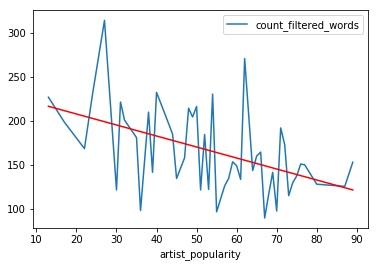

In [166]:
dfCountByPopularity = df.groupby(['artist_popularity']).median()

dfCountByPopularity.head(100)

dfCountByPopularity.plot(y='count_filtered_words') 
# Not clear, let's use a linear regression instead

#https://mrmint.fr/regression-lineaire-python-pratique
from scipy import stats
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

X = dfCountByPopularity.index.values # arist popularity
Y = dfCountByPopularity.iloc[0:len(dfCountByPopularity), 1].values # word count filtered

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud

mask = np.array(Image.open("../img/gun.jpg"))

w = WordCloud(mask=mask, background_color="white")
wordcloud = w.generate(" ".join(" ".join(t) for t in df.filtered_tokens))



# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
